
# SIMPLE LINEAR REGRESSION
# Credit goes to Dr. Ryan @STEMplicity




# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

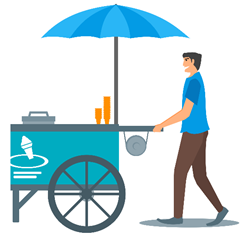

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [3]:
IceCream.head(20)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [4]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

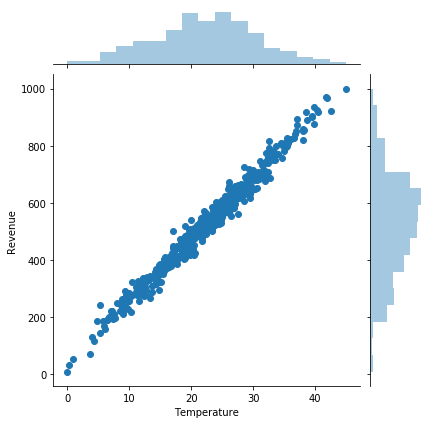

In [7]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

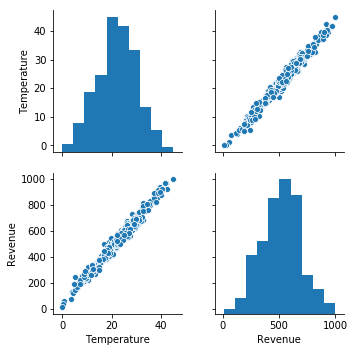

In [8]:
sns.pairplot(IceCream)

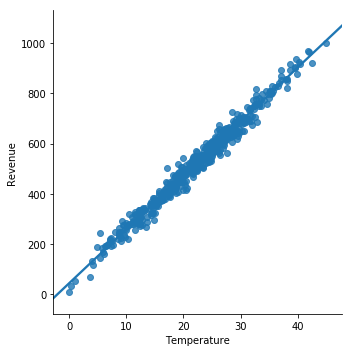

In [9]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)
# https://seaborn.pydata.org/tutorial/regression.html  (Visualizing Linear Relationships)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [10]:
y = IceCream['Revenue'] # dependent variable

In [11]:
X = IceCream[['Temperature']] # independent variable

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
5,14.352514
6,13.707780
7,30.833985
8,0.976870
9,31.669465


In [13]:
from sklearn.model_selection import train_test_split # to divide into 75% training data and 25% testing data ( could also be 70/30 or 80/20)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
X_train.shape # 75% of 500 

(375, 1)

In [16]:
X_test.shape # 25% of 500

(125, 1)

In [17]:
y_train.shape

(375,)

In [18]:
y_test.shape

(125,)

# STEP#5: TRAIN THE MODEL

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regressor = LinearRegression(fit_intercept =True)
#Parameters:	
#fit_intercept : boolean, optional, default True
# whether to calculate the intercept (b-Variable) for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).


In [21]:
regressor.fit(X_train,y_train) #fit method on object regressor -> model trained on our data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print('Linear Model Coefficient (m): ', regressor.coef_) # slope (Steigung)


Linear Model Coefficient (m):  [21.45890876]


In [23]:
print('Linear Model Coefficient (b): ', regressor.intercept_) # intercept (Y-Achsenabschnitt)

Linear Model Coefficient (b):  44.80930485914172


# STEP#6: TEST THE MODEL 

In [24]:
y_predict = regressor.predict(X_test) # using the test data for predicting the y data
y_predict

array([610.67529647, 498.53747869, 200.62991757, 645.64206533,
       217.19200135, 591.10669268, 571.0213764 , 547.10349644,
       559.49352444, 453.05669474, 622.99037365, 546.62898718,
       625.67208082, 669.88860007, 470.75235145, 175.57768896,
       458.27495414, 651.49052397, 543.65848666, 635.82973188,
       676.35740314, 479.29525182, 447.66881982, 610.47731228,
       775.73564647, 170.52534063, 510.03623709, 677.07000243,
       547.47667137, 465.78750437, 559.30663172, 330.86955754,
       657.4179619 , 764.78613785, 549.040702  , 202.21994996,
       706.47297002, 576.52240693, 229.07584152, 623.2710933 ,
       635.2864936 , 436.07447743, 606.77456127, 508.55013749,
       423.74149472, 452.06291829, 371.65402391, 798.44942973,
       733.79220268, 530.92087949, 501.4959987 , 718.89003925,
       321.64351667, 586.4568008 , 710.68638491, 741.79024806,
       659.58970003, 748.76950449, 581.03565385, 520.57903845,
       601.35415358, 693.88224522, 149.22564294, 666.98

In [25]:
y_test 

362    609.417479
155    497.752318
325    223.435016
53     628.453211
343    249.884252
20     612.153949
296    538.312890
485    501.345330
374    559.135869
28     517.534028
177    654.197406
241    506.432135
313    594.651009
184    652.005408
336    416.848618
134    158.849806
143    486.474984
157    625.804642
364    555.245217
434    640.177059
146    618.235766
212    437.251993
69     430.343903
457    646.266946
338    771.789537
300    170.237756
419    505.743867
79     682.752869
172    539.527740
372    506.222379
          ...    
17     921.508275
2      660.632289
443    698.971806
264    641.025389
213    506.493748
166    570.577875
8       55.390338
145    241.278548
111    427.211360
188    414.423028
332    379.564267
218    413.914067
308    756.037702
312    575.176896
276    535.708920
246    583.759781
314    621.969209
205    395.273750
360    633.504009
490    584.399945
52     666.136836
96     474.749392
388    221.400252
462    297.025414
395    690

## Training dataset

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

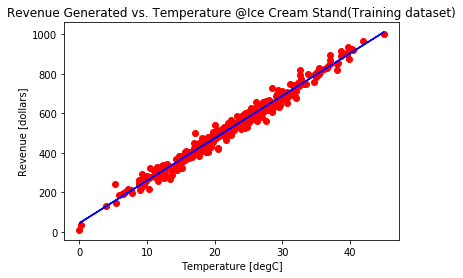

In [26]:
plt.scatter(X_train, y_train, color = 'red') # plot the Data
plt.plot(X_train, regressor.predict(X_train), color = 'blue') 
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

## Test dataset

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

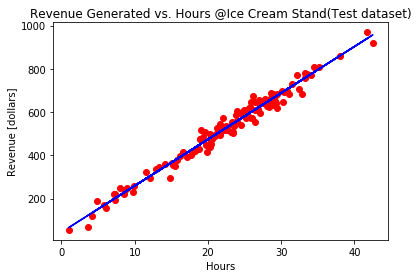

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

## Testing the data on single temperatures

In [30]:
Sample_T = np.array([[40]])

In [31]:
y_predict = regressor.predict(Sample_T)
y_predict

array([903.16565515])